# Laboratorio 1 Data Science
### Michele Benvenuto - 18232
### Michael Chan - 18562

### Importando Liberias 

In [12]:
import pandas as pd 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *

### Leemos el archivo de datos 

In [9]:
data = pd.read_csv("train.csv")

### Resumen de los datos

In [10]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Todos los datos con Dtype int64 o float64 representan datos cualitativos, mientras que los que tienen Dtype object representan datos categóricos.

In [1]:
# profile = ProfileReport(data)
# profile

### Aislando las variables numericas de las categóricas

Lista de variables categoricas

In [14]:
to_categoric = ["MSSubClass", "MSZoning","Street","Alley",
                "LotShape","LandContour","Utilities",
                "LotConfig","LandSlope","Neighborhood",
                "Condition1","Condition2","BldgType",
                "HouseStyle","OverallQual","OverallCond",
                "YearBuilt","RoofStyle","RoofMatl",
                "Exterior1st","Exterior2nd","MasVnrType",
                "ExterQual","ExterCond","Foundation",
                "BsmtQual","BsmtCond","BsmtExposure",
                "BsmtFinType1","BsmtFinType2","Heating",
                "HeatingQC","CentralAir","Electrical",
                "KitchenQual","Functional","FireplaceQu",
                "GarageType","GarageYrBlt","GarageFinish",
                "GarageQual","GarageCond","PavedDrive",
                "PoolQC","Fence","MiscFeature","MoSold",
                "YrSold","SaleType","SaleCondition"]

Cambiando las variables a categóricas

In [15]:
data = clean(data, method='dtypes', columns = to_categoric, dtype='category')

In [16]:
#revisando que se realizaron los cambios
explore(data)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\quickda\explore_data.py:26: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\quickda\explore_data.py:30: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
1stFlrSF,int64,1460,0,0.000,753,334.0,882.0,1087.0,1391.25,4692.0,1162.626712,1087.0,386.587738,1.376757
2ndFlrSF,int64,1460,0,0.000,417,0.0,0.0,0.0,728.0,2065.0,346.992466,0.0,436.528436,0.81303
3SsnPorch,int64,1460,0,0.000,20,0.0,0.0,0.0,0.0,508.0,3.409589,0.0,29.317331,10.304342
Alley,category,91,1369,0.938,2,-,-,-,-,-,-,-,-,-
BedroomAbvGr,int64,1460,0,0.000,8,0.0,2.0,3.0,3.0,8.0,2.866438,3.0,0.815778,0.21179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Utilities,category,1460,0,0.000,2,-,-,-,-,-,-,-,-,-
WoodDeckSF,int64,1460,0,0.000,274,0.0,0.0,0.0,168.0,857.0,94.244521,0.0,125.338794,1.541376
YearBuilt,category,1460,0,0.000,112,-,-,-,-,-,-,-,-,-
YearRemodAdd,int64,1460,0,0.000,61,1950.0,1967.0,1994.0,2004.0,2010.0,1984.865753,1994.0,20.645407,-0.503562


### Explorando los datos númericos

Outlier Analysis - Boxplot


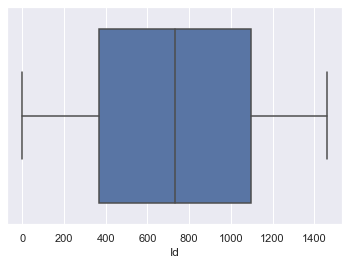

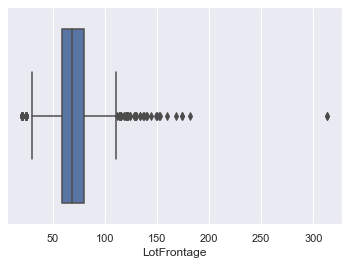

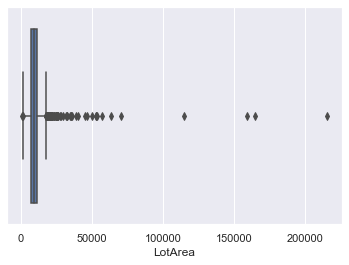

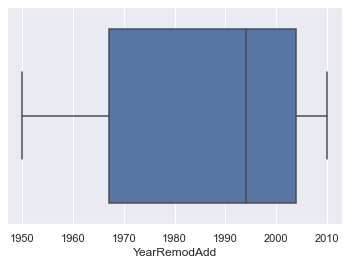

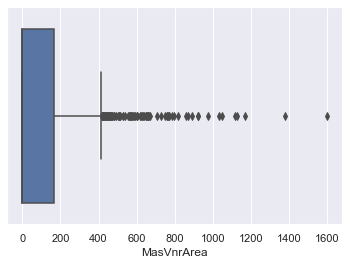

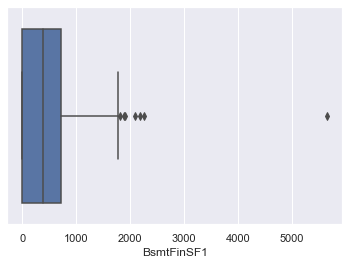

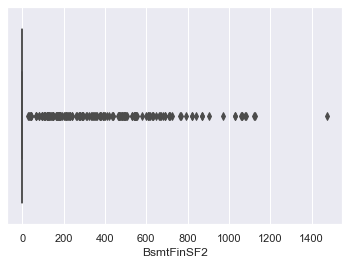

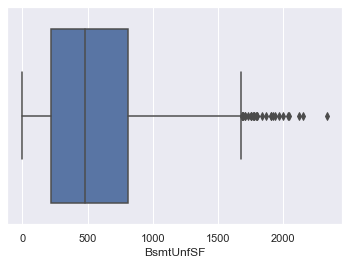

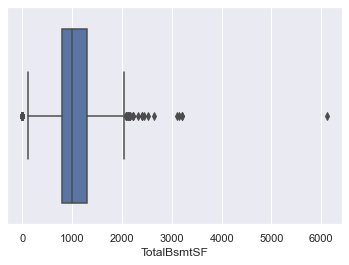

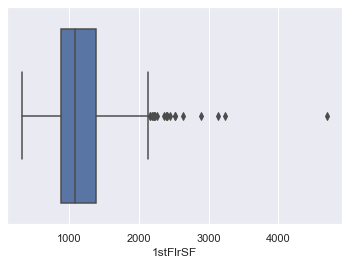

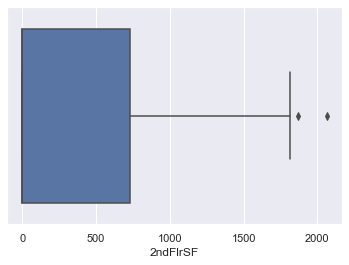

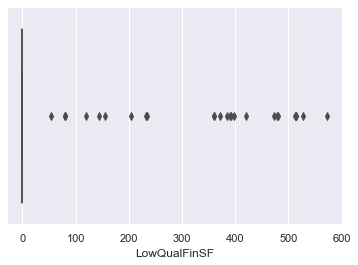

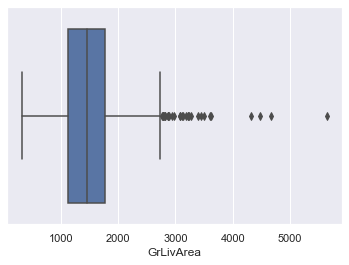

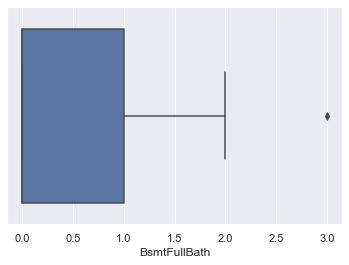

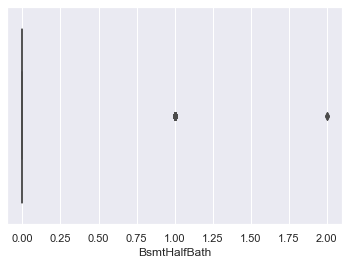

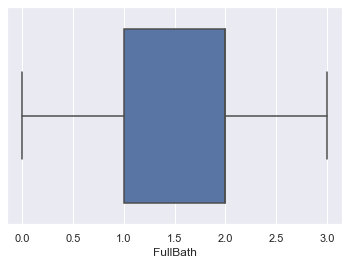

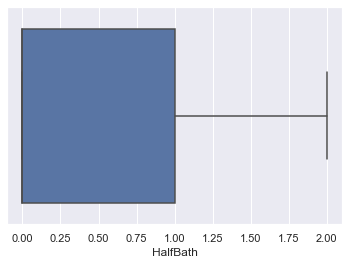

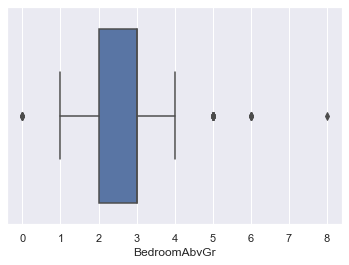

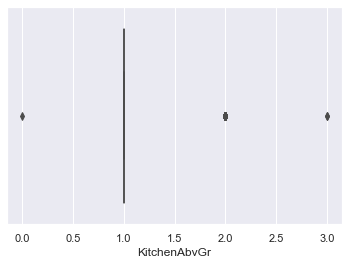

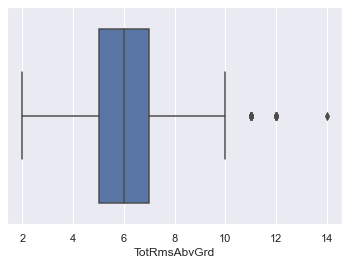

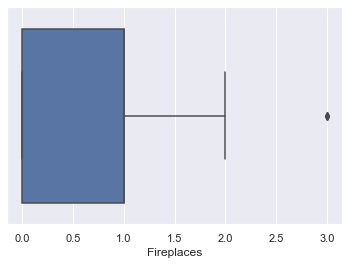

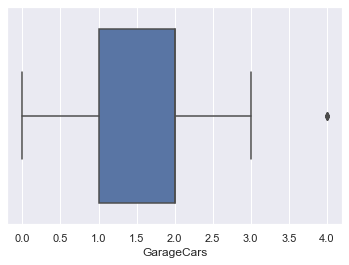

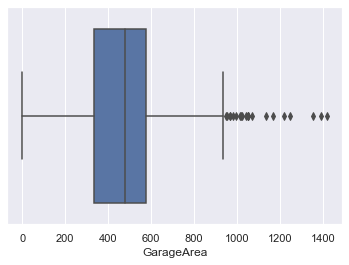

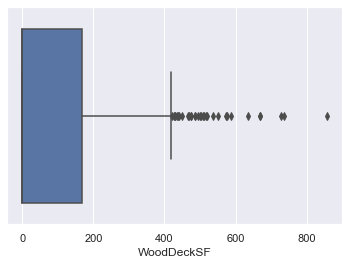

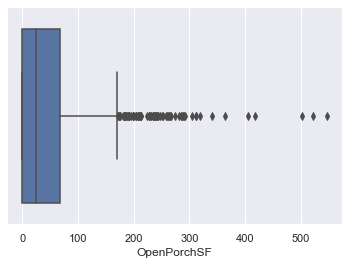

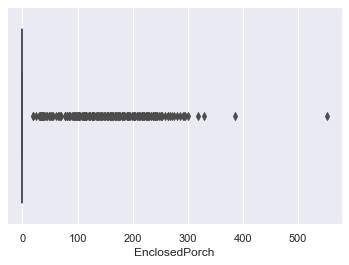

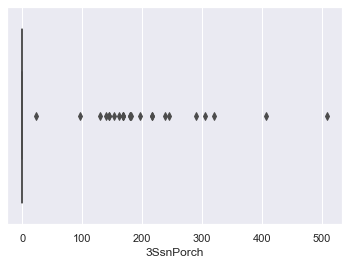

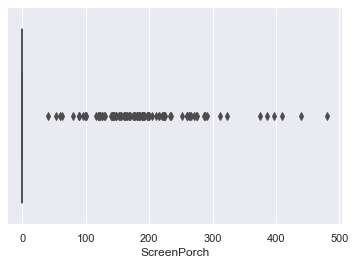

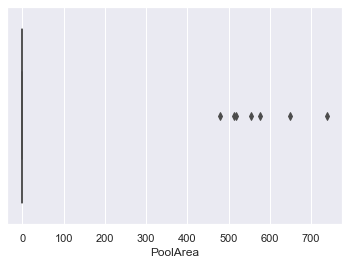

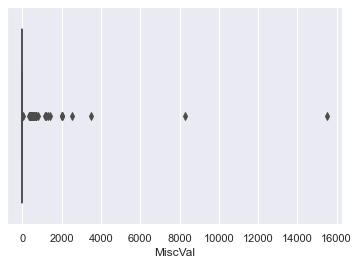

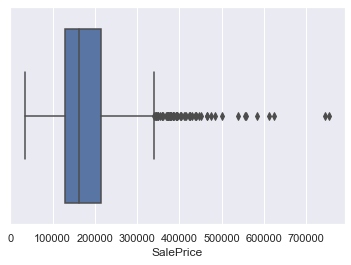

Distribution Analysis - Histogram


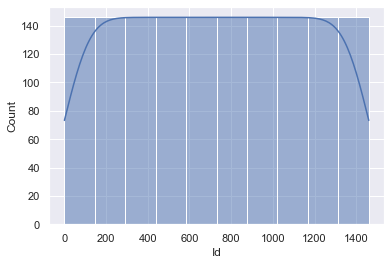

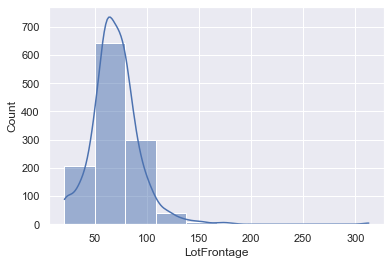

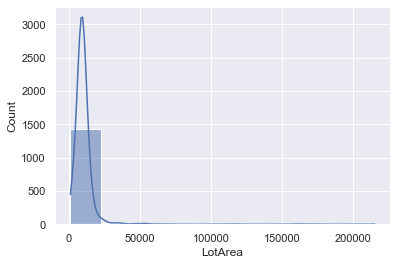

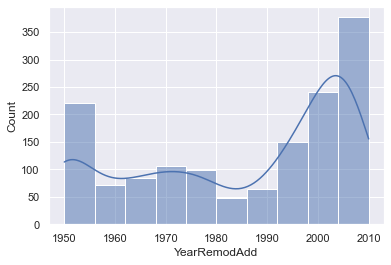

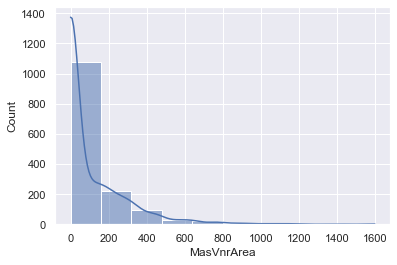

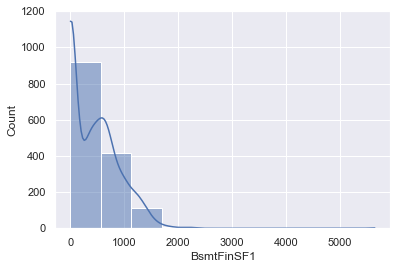

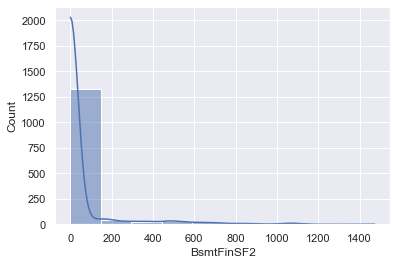

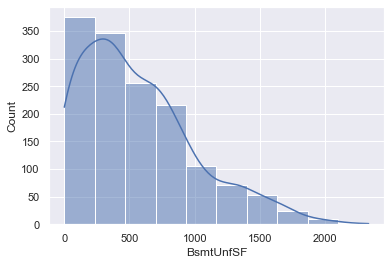

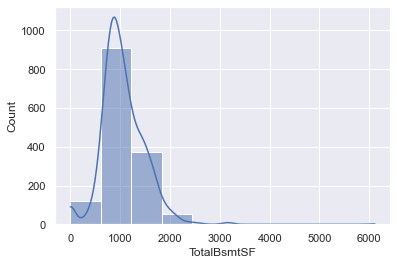

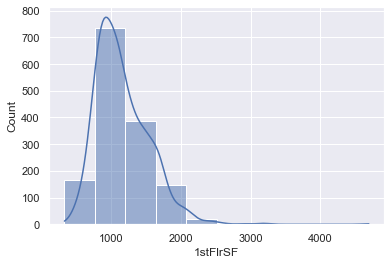

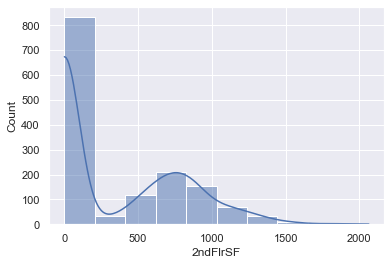

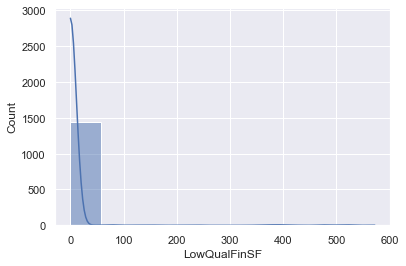

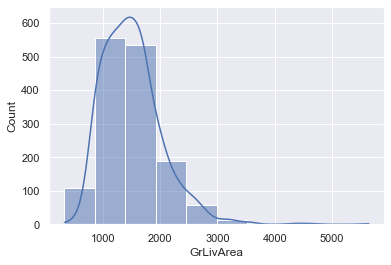

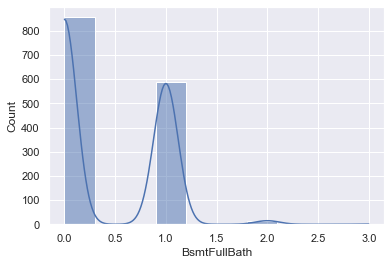

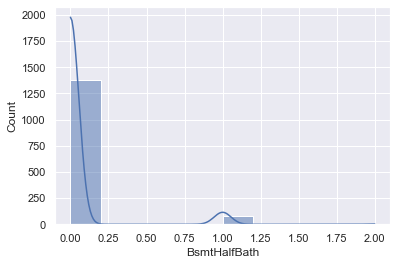

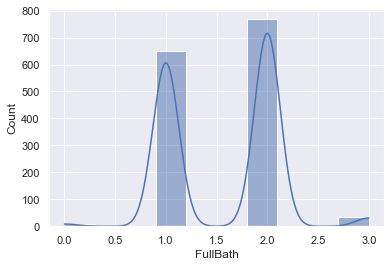

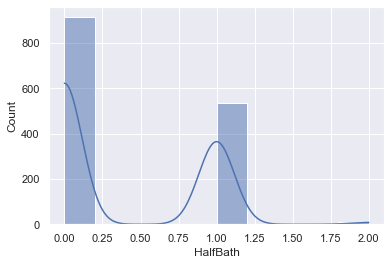

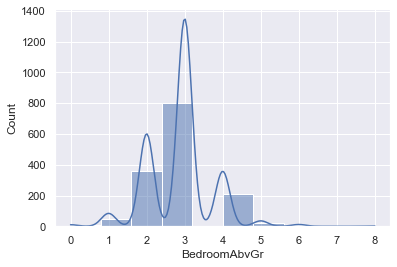

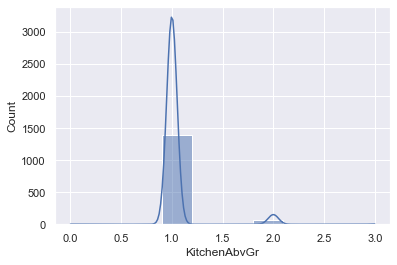

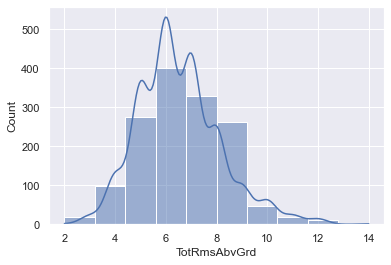

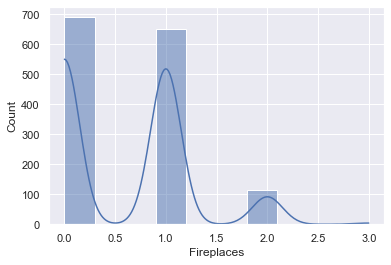

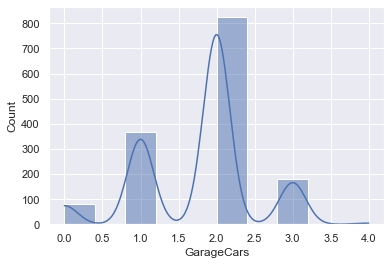

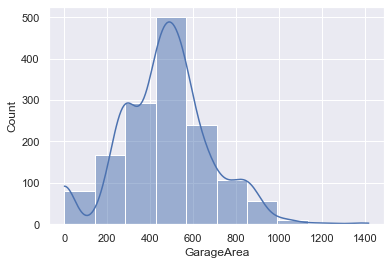

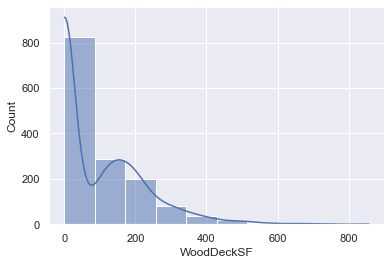

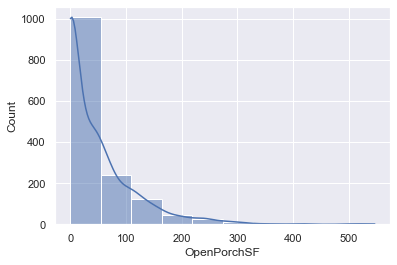

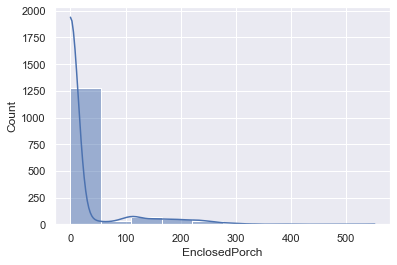

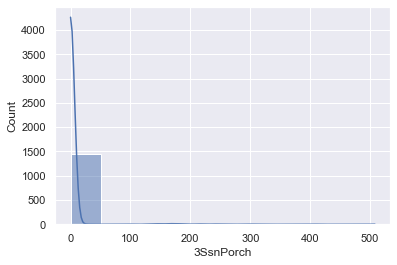

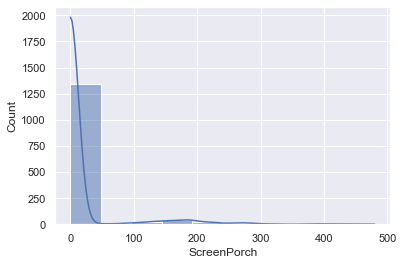

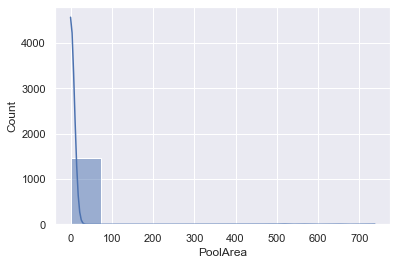

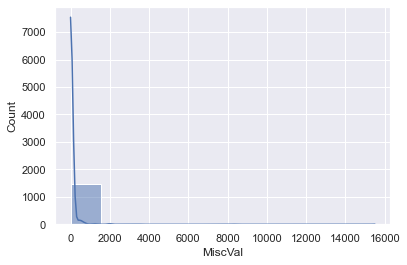

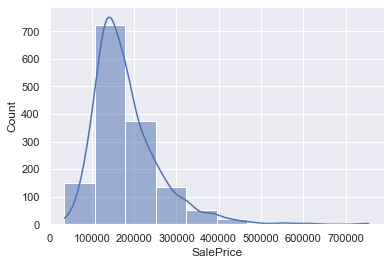

In [17]:
eda_num(data)

Al analizar los gráficos se puede observar que los promedios tienden a estar en el lado bajo y los datos atípicos están en los datos altos, haciendo referencia que aparte de las casas normales son pocas las grandes de personas adineradas.

### Explorando los datos categóricos

Bar Plot of MSSubClass


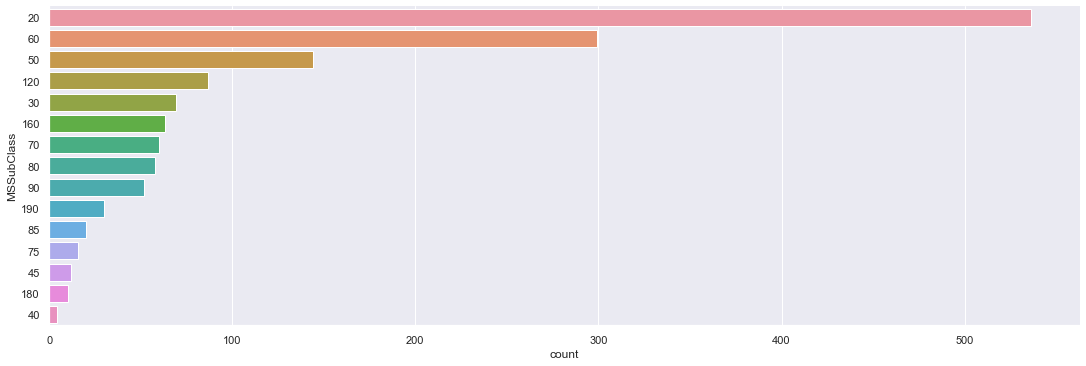

Summary of MSSubClass
Bar Plot of MSZoning


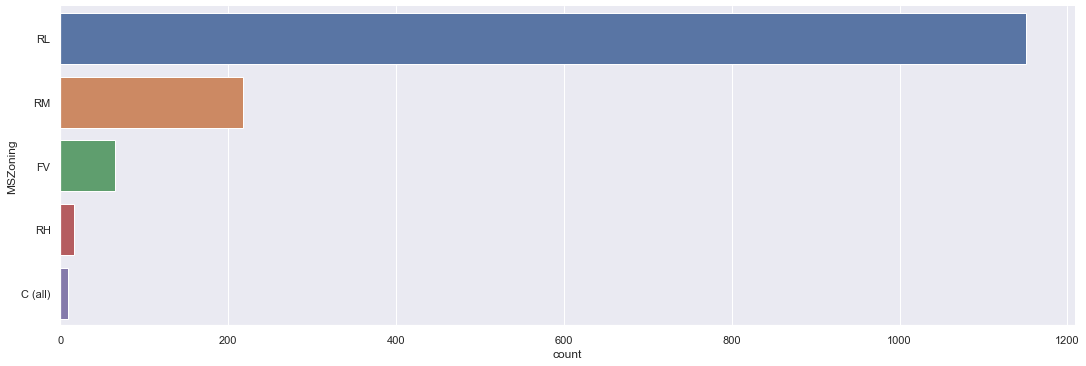

Summary of MSZoning
Bar Plot of Street


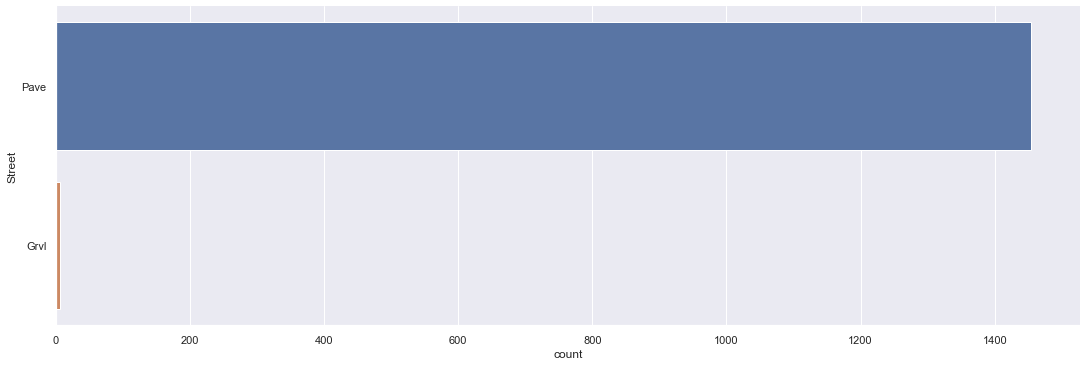

Summary of Street
Bar Plot of Alley


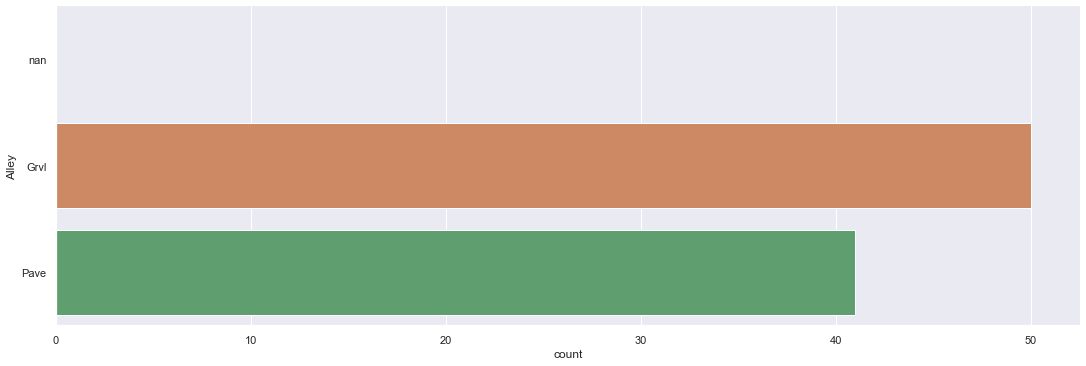

Summary of Alley
Bar Plot of LotShape


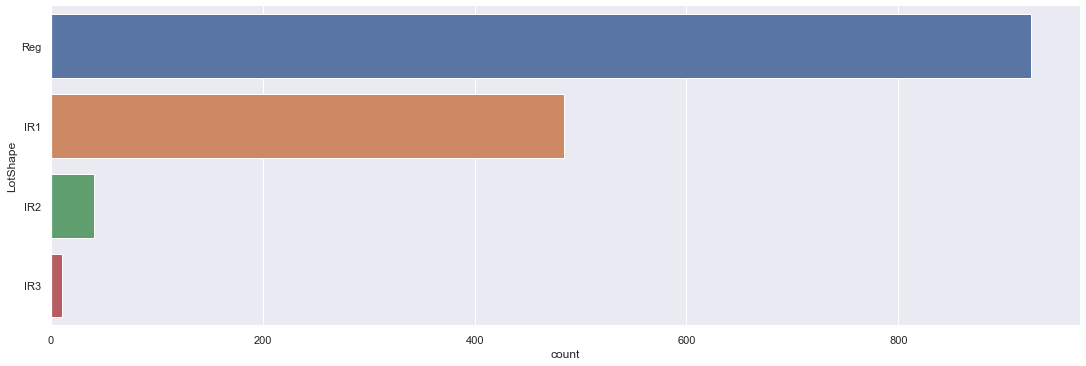

Summary of LotShape
Bar Plot of LandContour


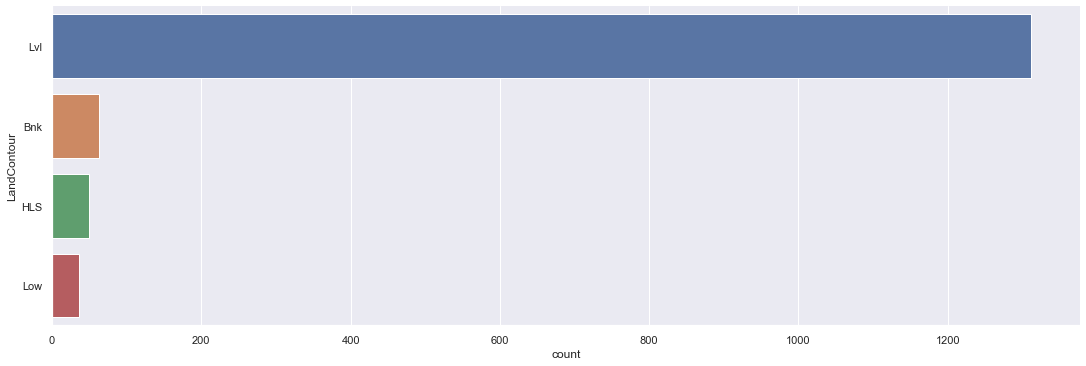

Summary of LandContour
Bar Plot of Utilities


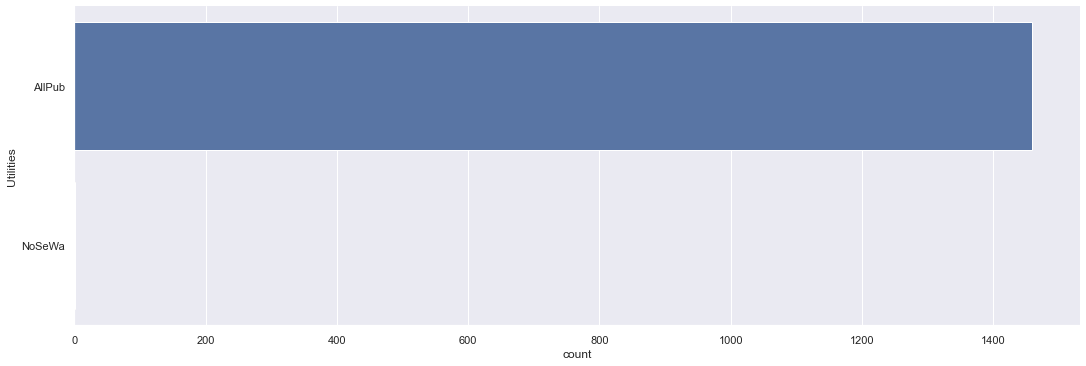

Summary of Utilities
Bar Plot of LotConfig


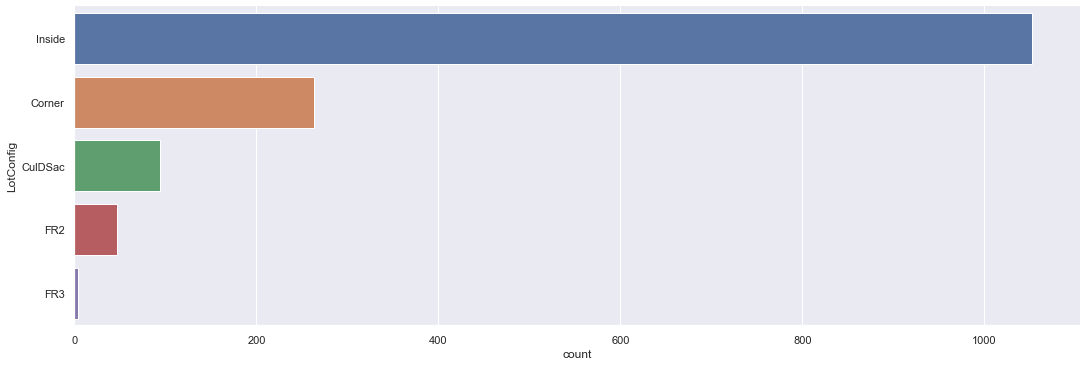

Summary of LotConfig
Bar Plot of LandSlope


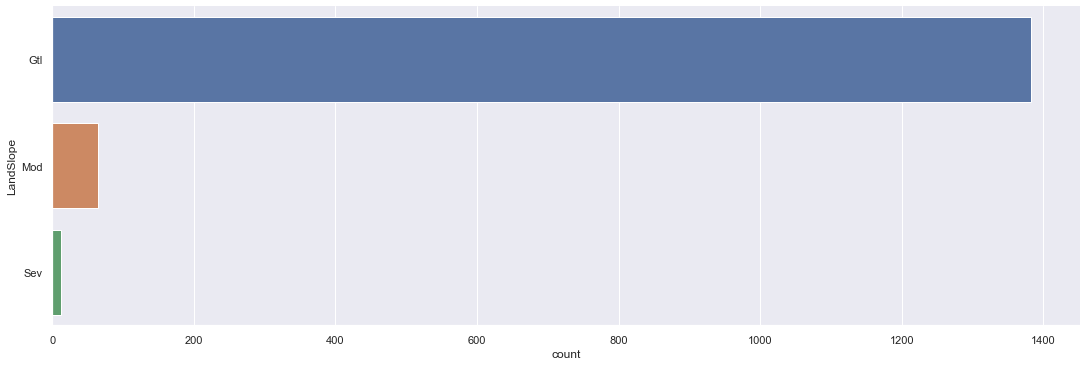

Summary of LandSlope
Bar Plot of Neighborhood


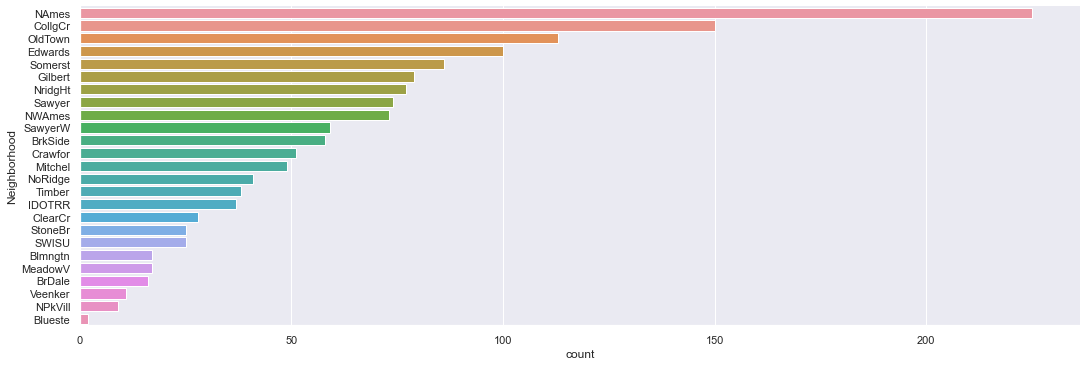

Summary of Neighborhood
Bar Plot of Condition1


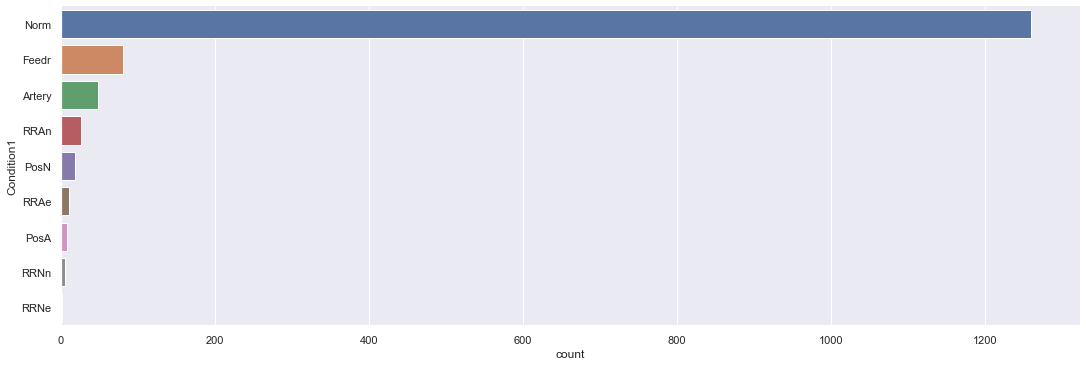

Summary of Condition1
Bar Plot of Condition2


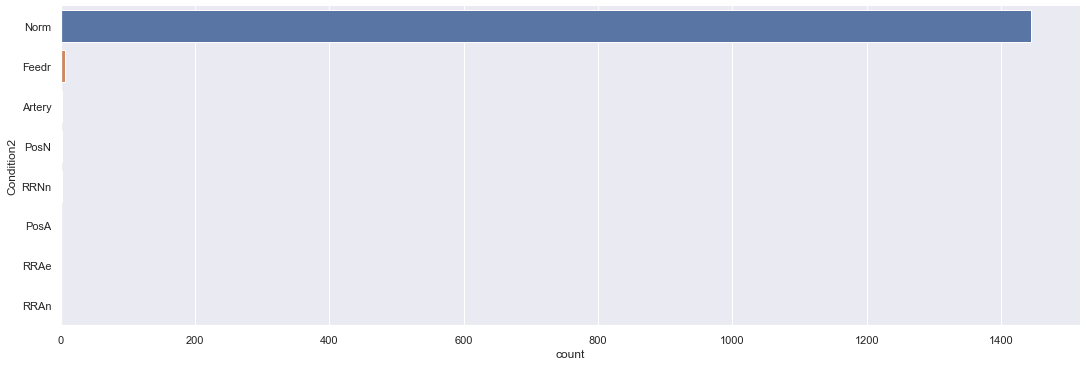

Summary of Condition2
Bar Plot of BldgType


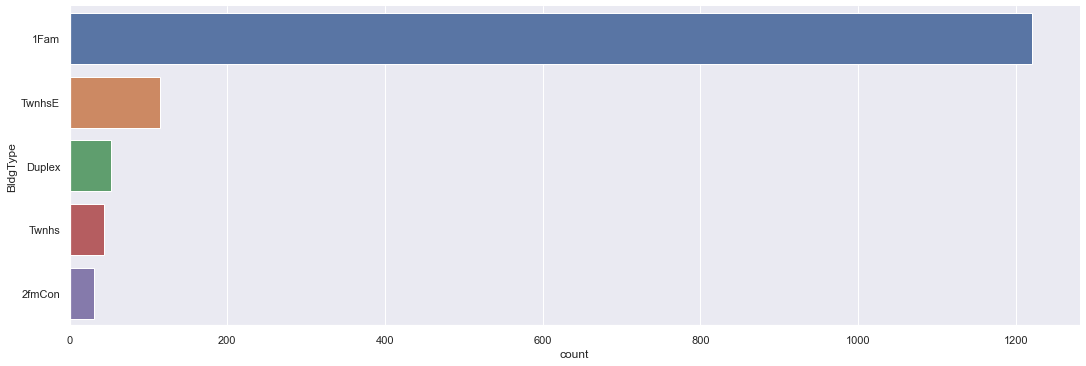

Summary of BldgType
Bar Plot of HouseStyle


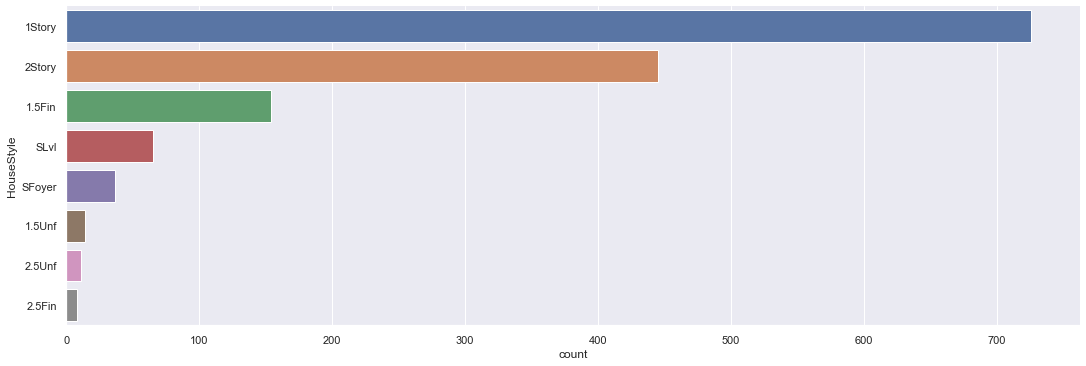

Summary of HouseStyle
Bar Plot of OverallQual


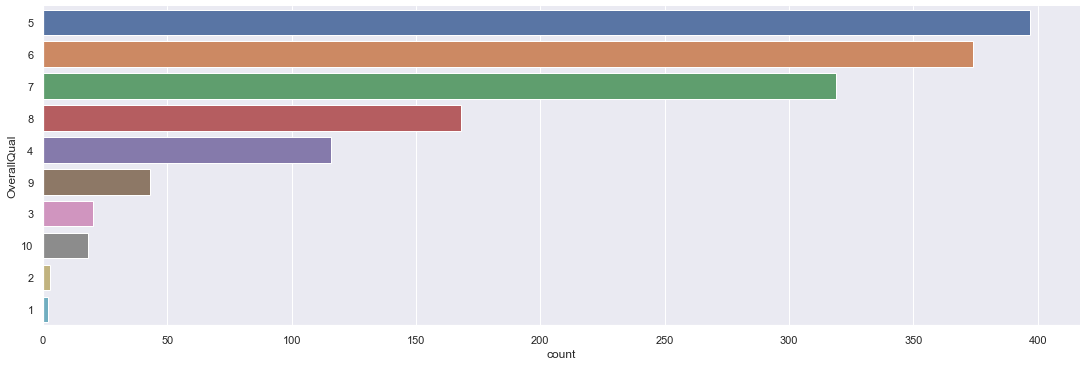

Summary of OverallQual
Bar Plot of OverallCond


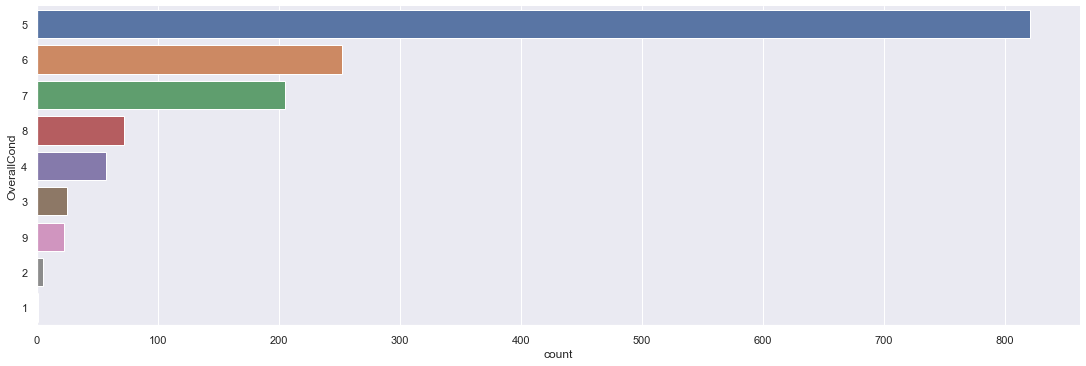

Summary of OverallCond
Bar Plot of YearBuilt


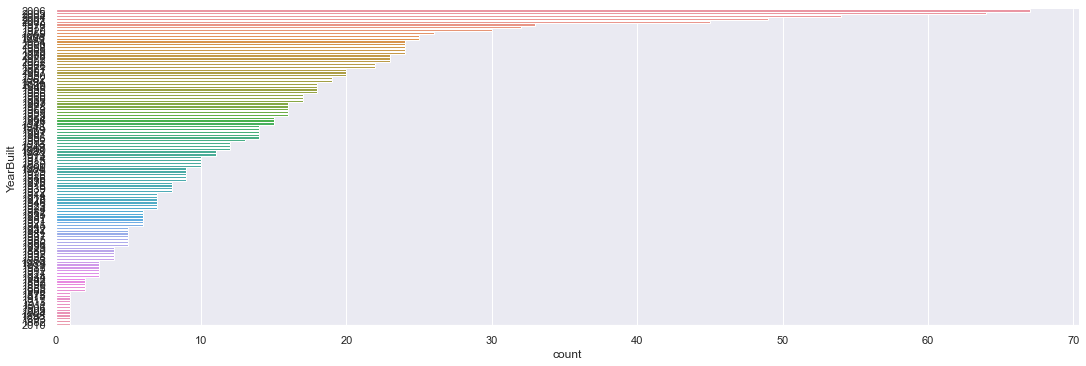

Summary of YearBuilt
Bar Plot of RoofStyle


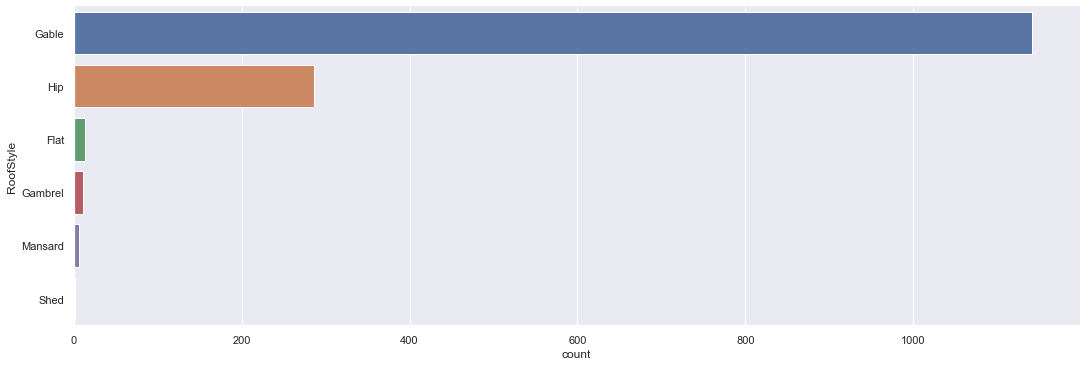

Summary of RoofStyle
Bar Plot of RoofMatl


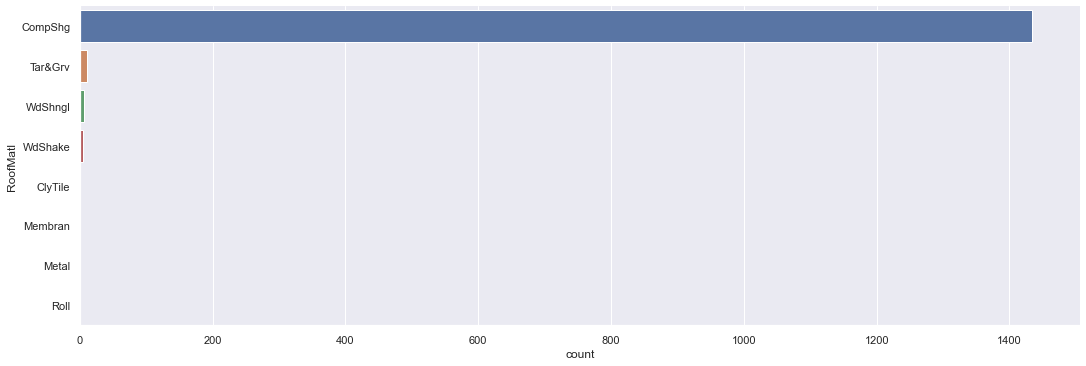

Summary of RoofMatl
Bar Plot of Exterior1st


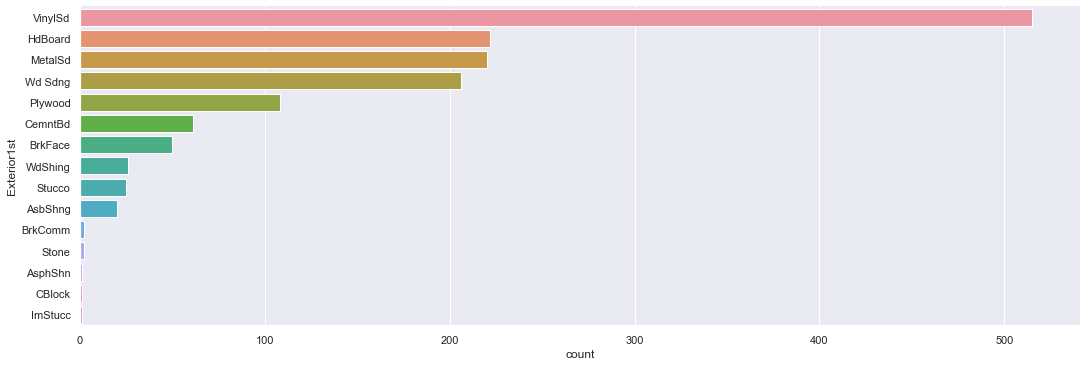

Summary of Exterior1st
Bar Plot of Exterior2nd


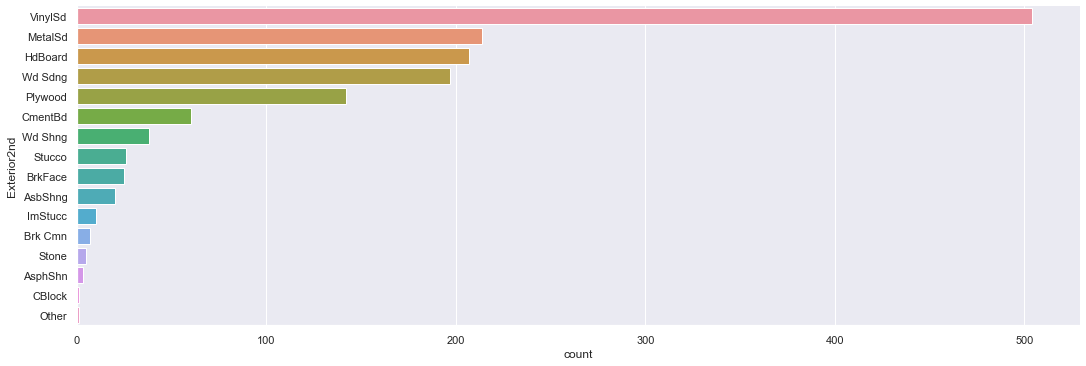

Summary of Exterior2nd
Bar Plot of MasVnrType


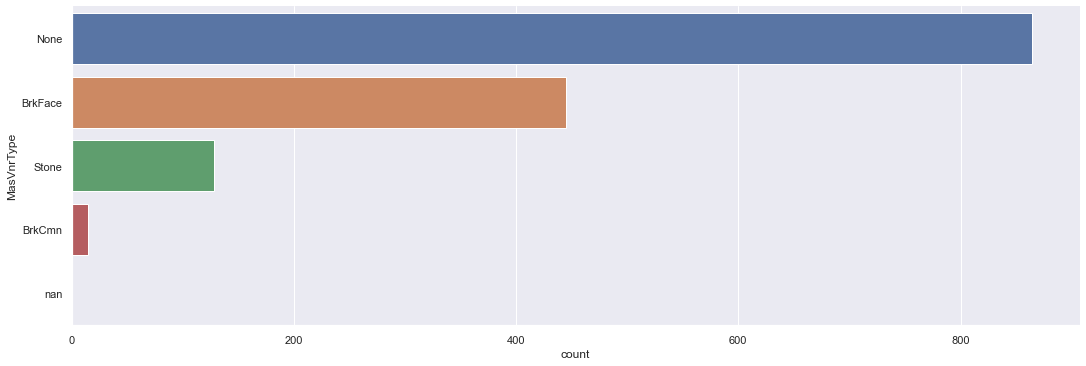

Summary of MasVnrType
Bar Plot of ExterQual


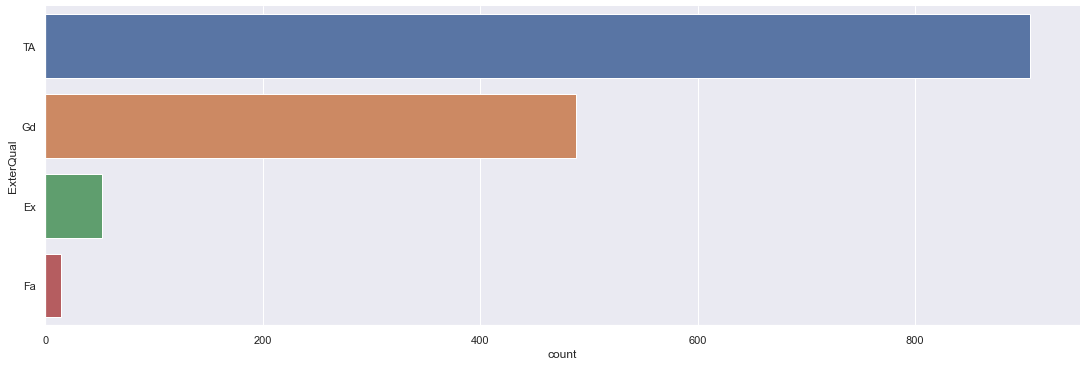

Summary of ExterQual
Bar Plot of ExterCond


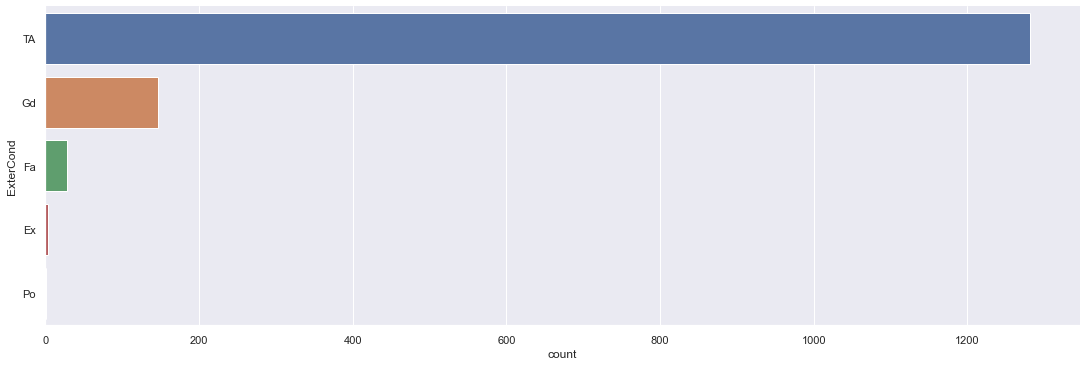

Summary of ExterCond
Bar Plot of Foundation


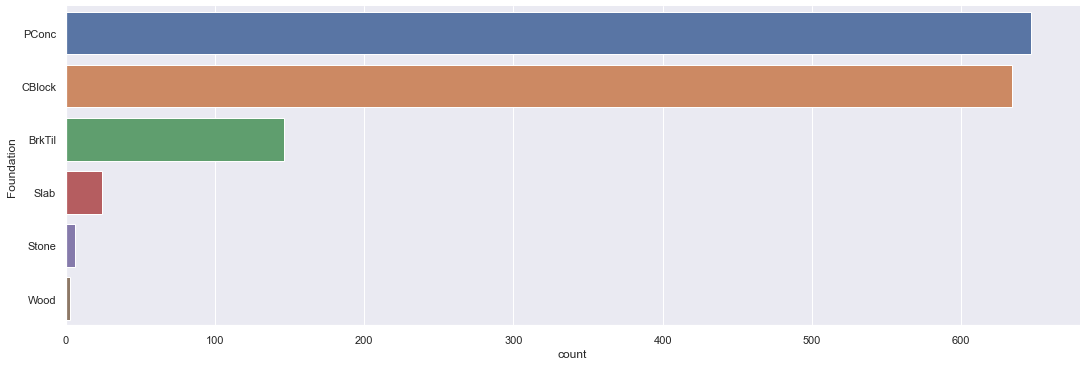

Summary of Foundation
Bar Plot of BsmtQual


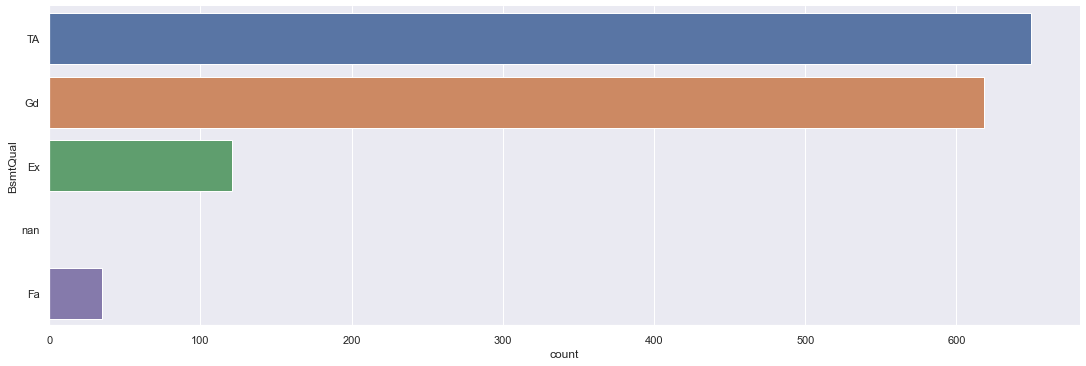

Summary of BsmtQual
Bar Plot of BsmtCond


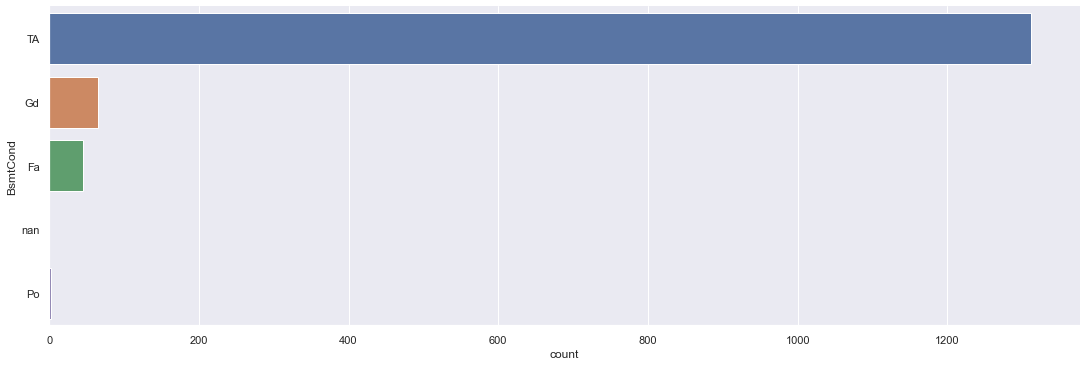

Summary of BsmtCond
Bar Plot of BsmtExposure


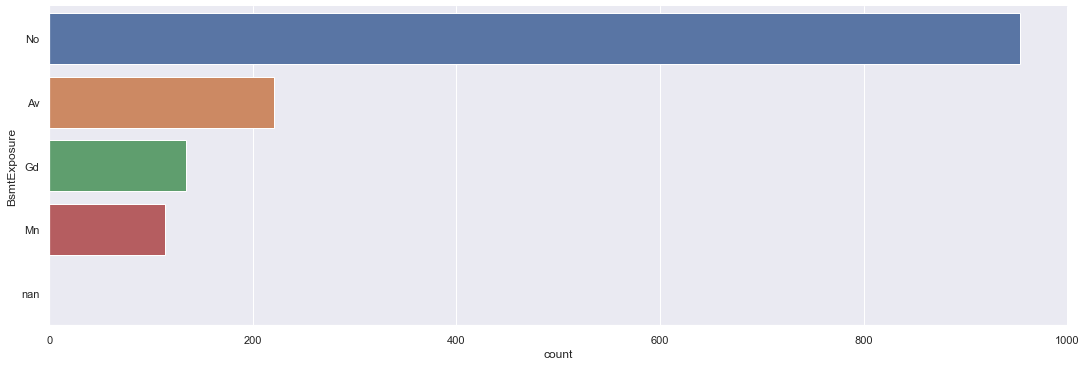

Summary of BsmtExposure
Bar Plot of BsmtFinType1


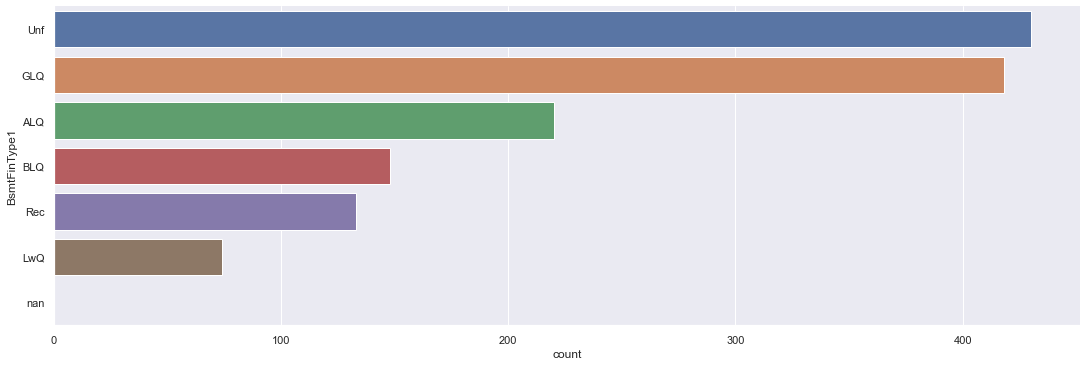

Summary of BsmtFinType1
Bar Plot of BsmtFinType2


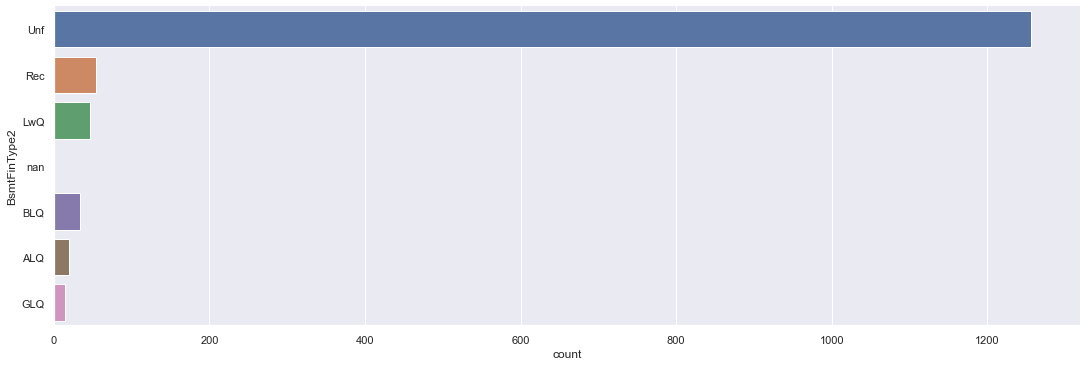

Summary of BsmtFinType2
Bar Plot of Heating


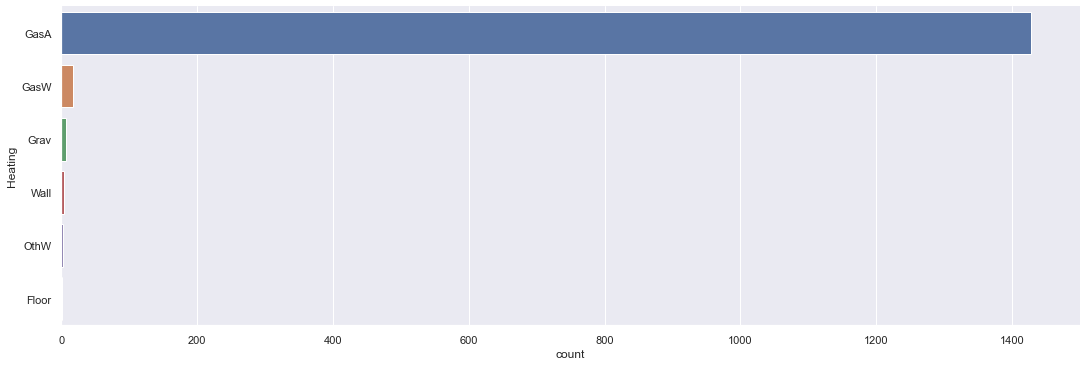

Summary of Heating
Bar Plot of HeatingQC


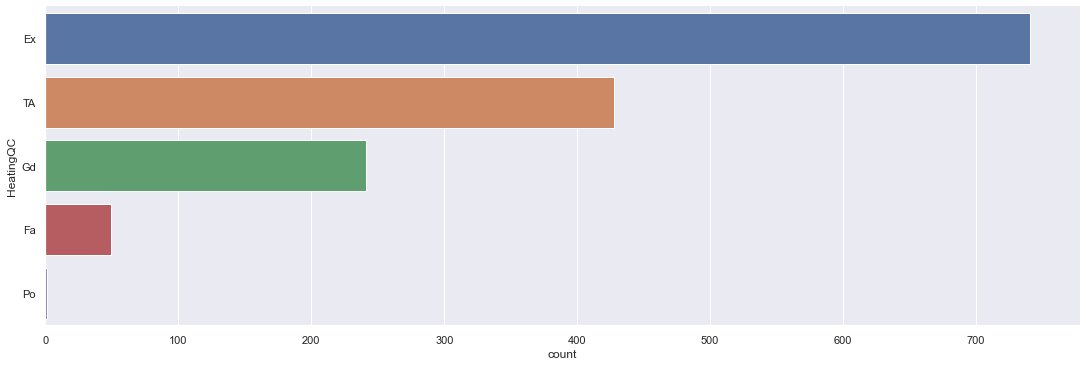

Summary of HeatingQC
Bar Plot of CentralAir


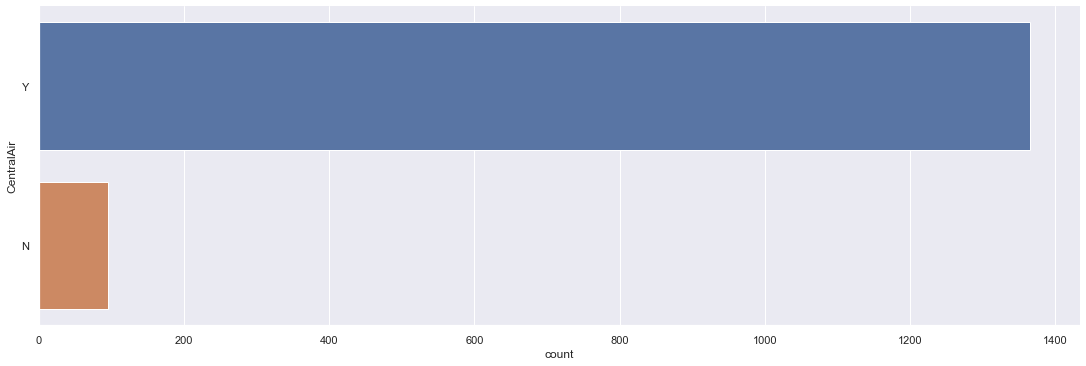

Summary of CentralAir
Bar Plot of Electrical


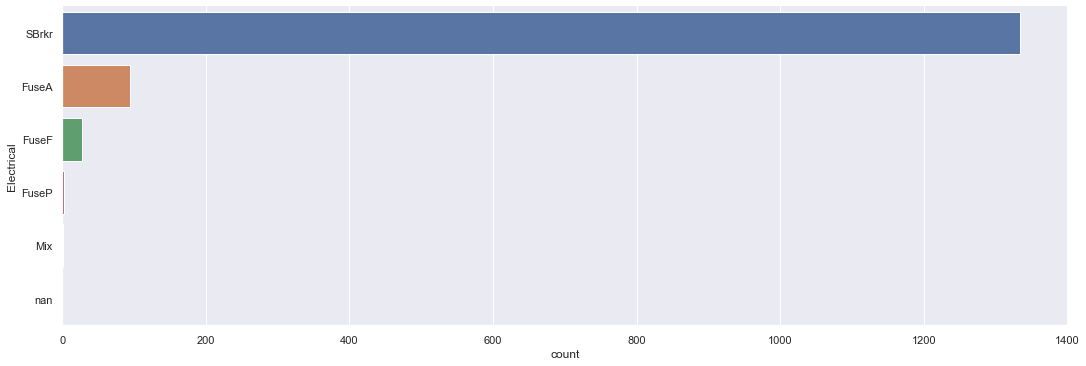

Summary of Electrical
Bar Plot of KitchenQual


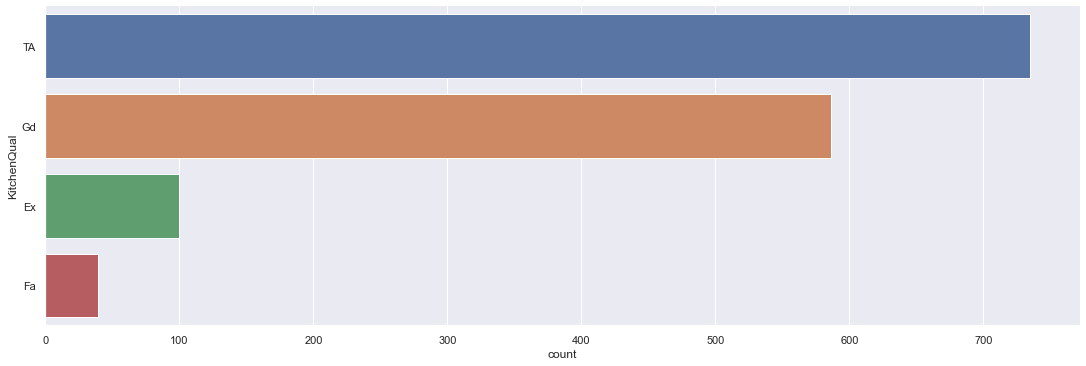

Summary of KitchenQual
Bar Plot of Functional


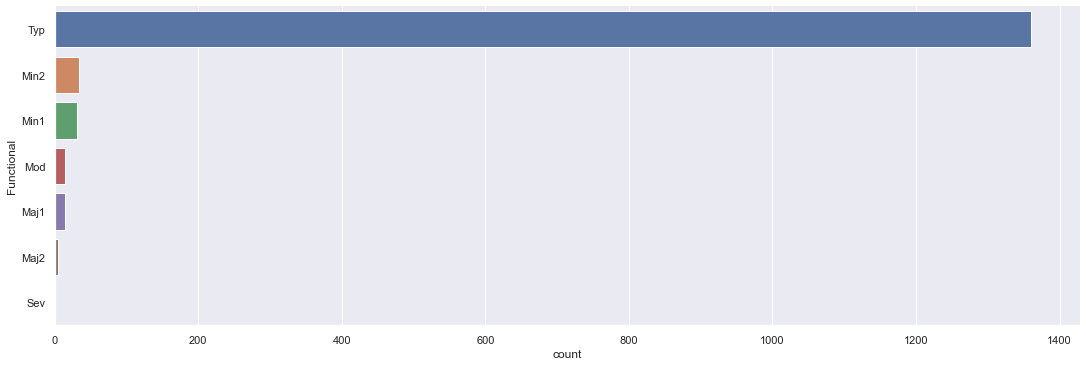

Summary of Functional
Bar Plot of FireplaceQu


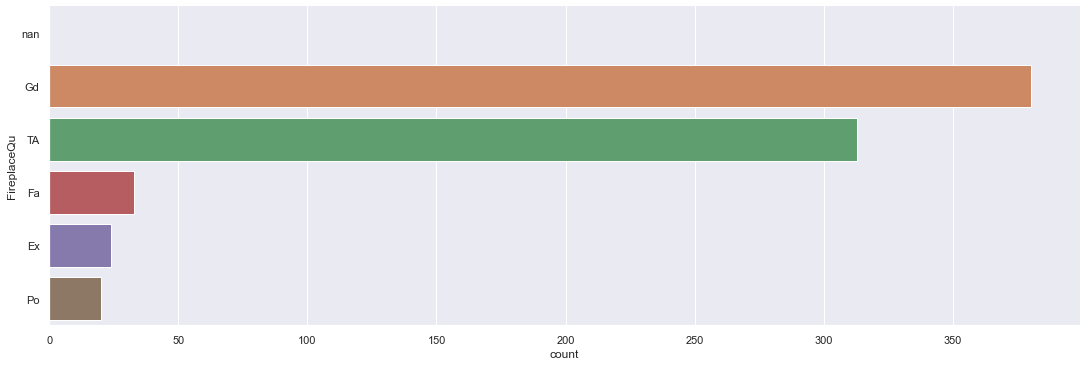

Summary of FireplaceQu
Bar Plot of GarageType


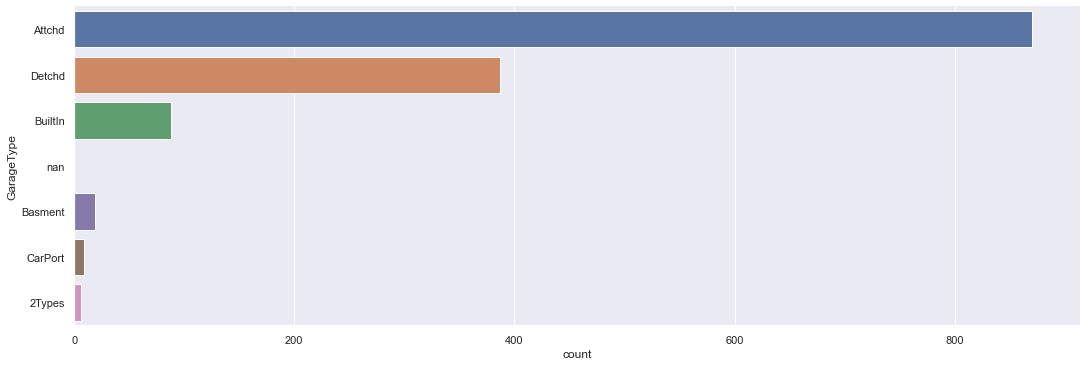

Summary of GarageType
Bar Plot of GarageYrBlt


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



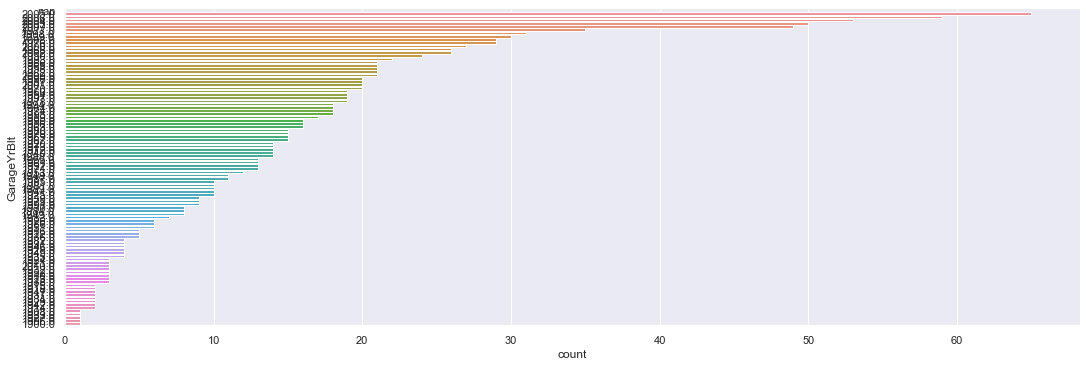

Summary of GarageYrBlt
Bar Plot of GarageFinish


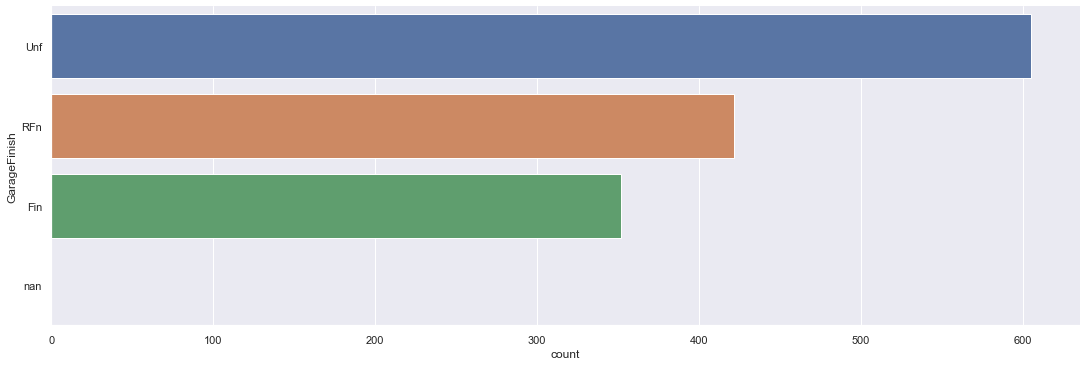

Summary of GarageFinish
Bar Plot of GarageQual


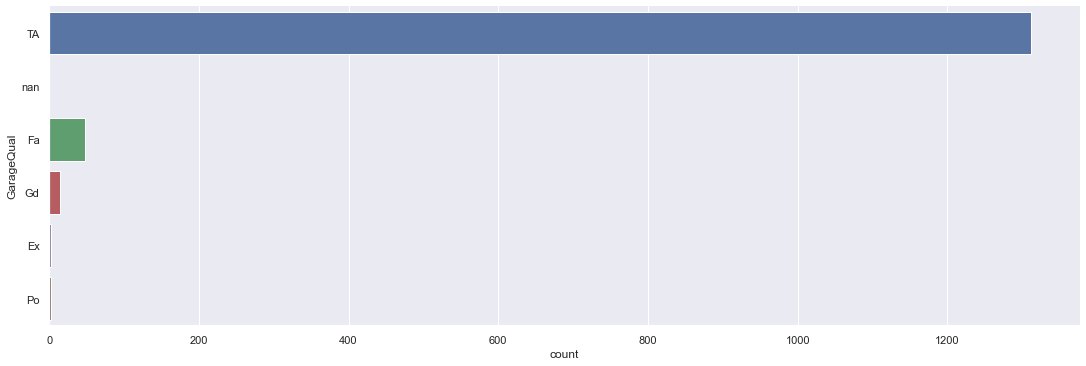

Summary of GarageQual
Bar Plot of GarageCond


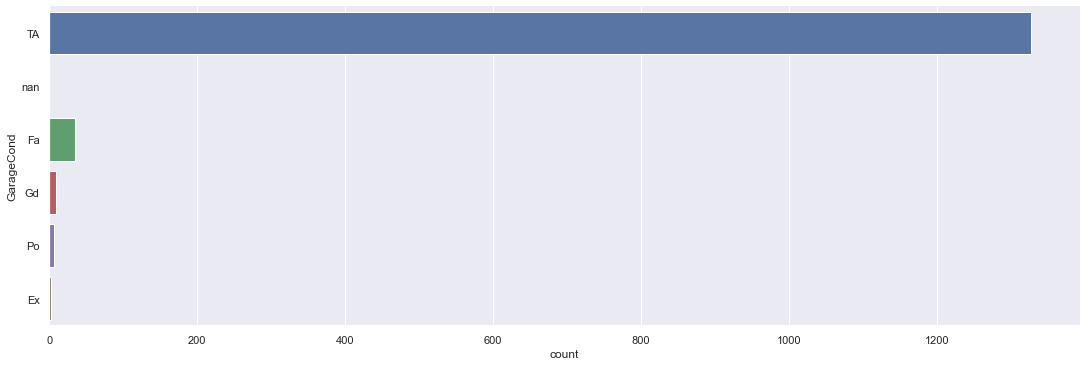

Summary of GarageCond
Bar Plot of PavedDrive


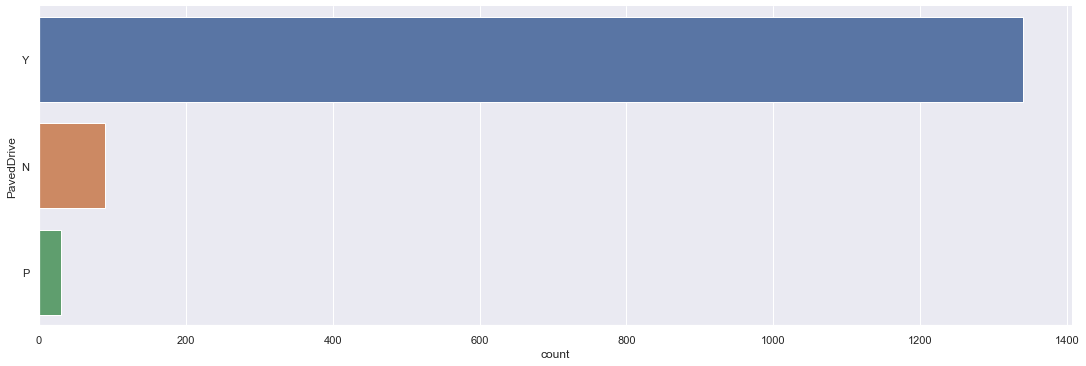

Summary of PavedDrive
Bar Plot of PoolQC


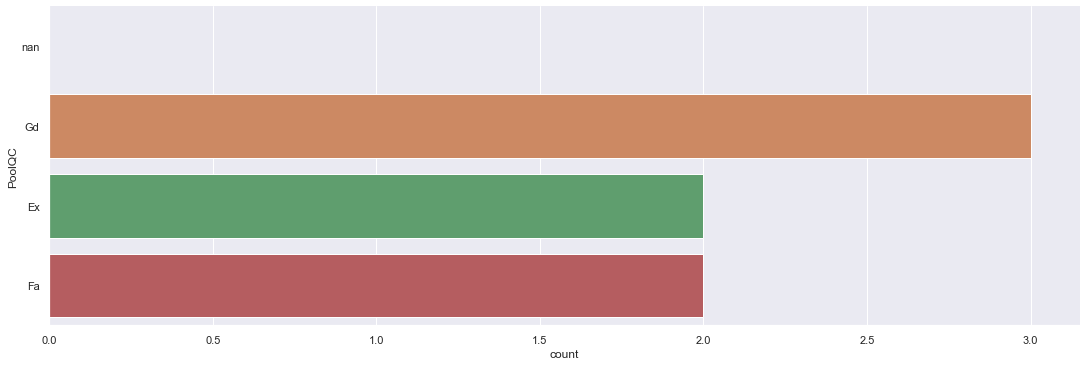

Summary of PoolQC
Bar Plot of Fence


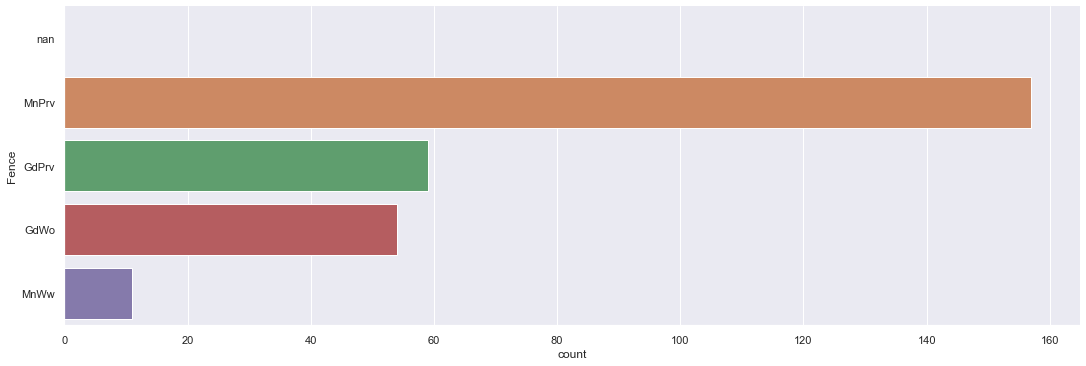

Summary of Fence
Bar Plot of MiscFeature


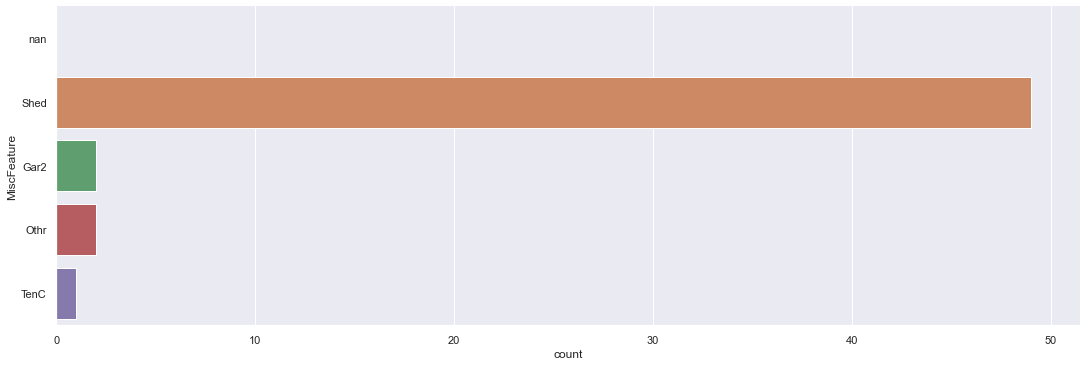

Summary of MiscFeature
Bar Plot of MoSold


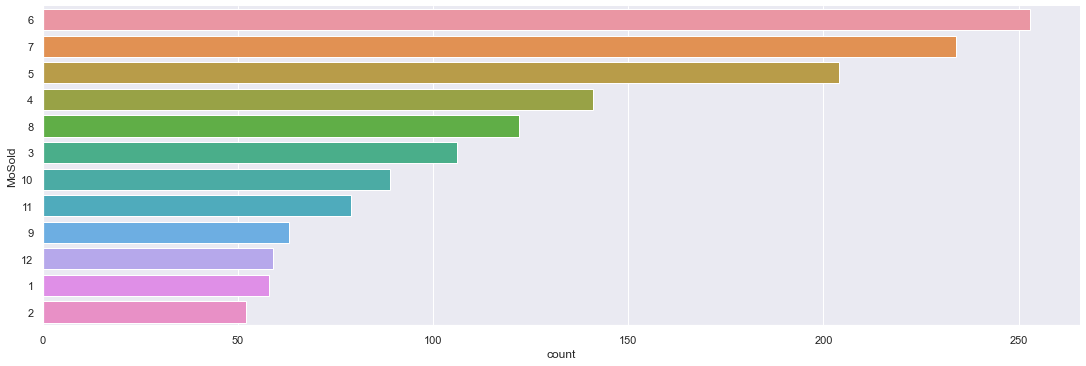

Summary of MoSold
Bar Plot of YrSold


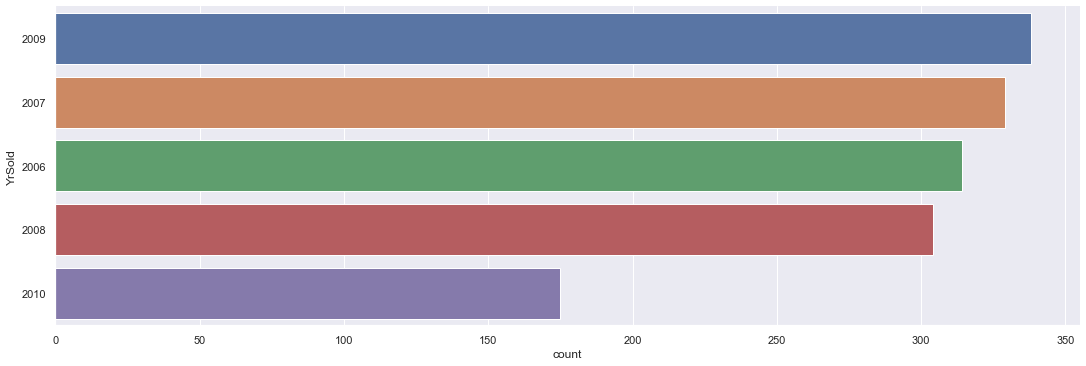

Summary of YrSold
Bar Plot of SaleType


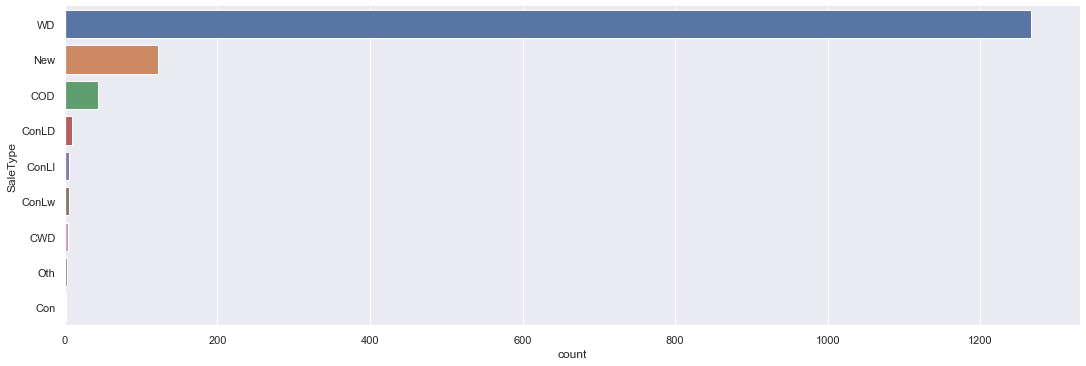

Summary of SaleType
Bar Plot of SaleCondition


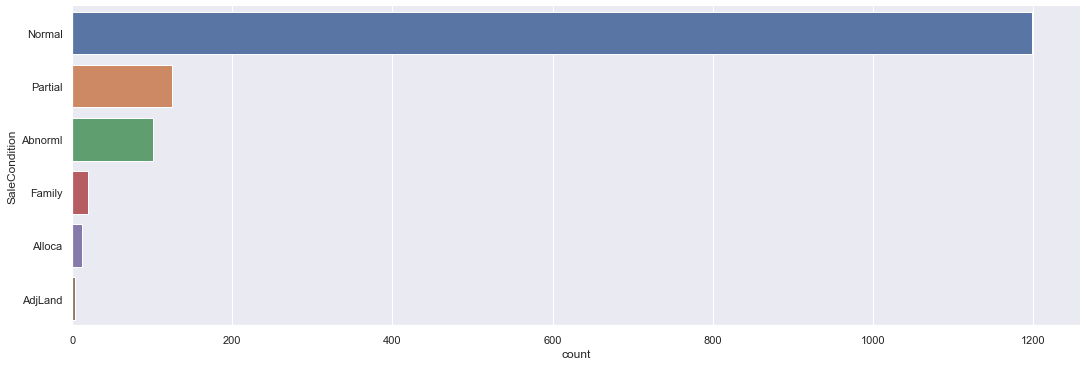

Summary of SaleCondition


In [27]:
for var in to_categoric:
    eda_cat(data, x = var)

### Explorando correlaciones 

In [28]:
eda_num(data, method ='correlation')

Correlation Analysis - Heatmap


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.00,-0.01,-0.03,-0.02,-0.05,-0.01,-0.01,-0.01,-0.02,0.01,0.01,-0.04,0.01,0.00,-0.02,0.01,0.01,0.04,0.00,0.03,-0.02,0.02,0.02,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,-0.02
LotFrontage,-0.01,1.00,0.43,0.09,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,-0.01,0.20,0.05,0.26,-0.01,0.35,0.27,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.35
LotArea,-0.03,0.43,1.00,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.26
YearRemodAdd,-0.02,0.09,0.01,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.51
MasVnrArea,-0.05,0.19,0.10,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.09,0.03,0.28,0.20,0.10,-0.04,0.28,0.25,0.36,0.37,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,0.48
BsmtFinSF1,-0.01,0.23,0.21,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,0.39
BsmtFinSF2,-0.01,0.05,0.11,-0.07,-0.07,-0.05,1.00,-0.21,0.10,0.10,-0.10,0.01,-0.01,0.16,0.07,-0.08,-0.03,-0.02,-0.04,-0.04,0.05,-0.04,-0.02,0.07,0.00,0.04,-0.03,0.09,0.04,0.00,-0.01
BsmtUnfSF,-0.01,0.13,-0.00,0.18,0.11,-0.50,-0.21,1.00,0.42,0.32,0.00,0.03,0.24,-0.42,-0.10,0.29,-0.04,0.17,0.03,0.25,0.05,0.21,0.18,-0.01,0.13,-0.00,0.02,-0.01,-0.04,-0.02,0.21
TotalBsmtSF,-0.02,0.39,0.26,0.29,0.36,0.52,0.10,0.42,1.00,0.82,-0.17,-0.03,0.45,0.31,-0.00,0.32,-0.05,0.05,-0.07,0.29,0.34,0.43,0.49,0.23,0.25,-0.10,0.04,0.08,0.13,-0.02,0.61
1stFlrSF,0.01,0.46,0.30,0.24,0.34,0.45,0.10,0.32,0.82,1.00,-0.20,-0.01,0.57,0.24,0.00,0.38,-0.12,0.13,0.07,0.41,0.41,0.44,0.49,0.24,0.21,-0.07,0.06,0.09,0.13,-0.02,0.61


### Hallazgos y conclusiones

Con base al análisis exploratorio podemos observar las características que posee una casa en promedio y su valor en el mercado. Datos como estos son de gran importancia en el mercado de bienes raíces. A pesar de que el tamaño de los terrenos importe bastante, los otros datos también llegan a influir de gran manera. El dataset cuenta con varias columnas con valores nulos, siendo mayormente columnas que hacen referencia al parqueo y al jardín.

Según las gráficas, las casas se suelen mantener en un estándar bajo, existiendo datos atípicos en su mayoría hacia arriba, se llegó a la conclusión que representan casas de personas más adineradas que poseen grandes casas.